In [54]:
import gpfanova, scipy
import numpy as np
import matplotlib.pyplot as plt

In [55]:
%matplotlib inline

In [56]:
ds = gpfanova.dataset.DataSet('data/lund/propionicAcid-ecoli/')
x,y,effect,labels = ds.build(effects=['pH','propionicAcidmM'],scale='range')

# y = np.log2(y+1e-9)
# y = y-y.min()
# y = (y-y.mean())/y.std()

dm = np.ones((y.shape[1],1))

OSError: [Errno 2] No such file or directory: 'data/lund/propionicAcid-ecoli/'

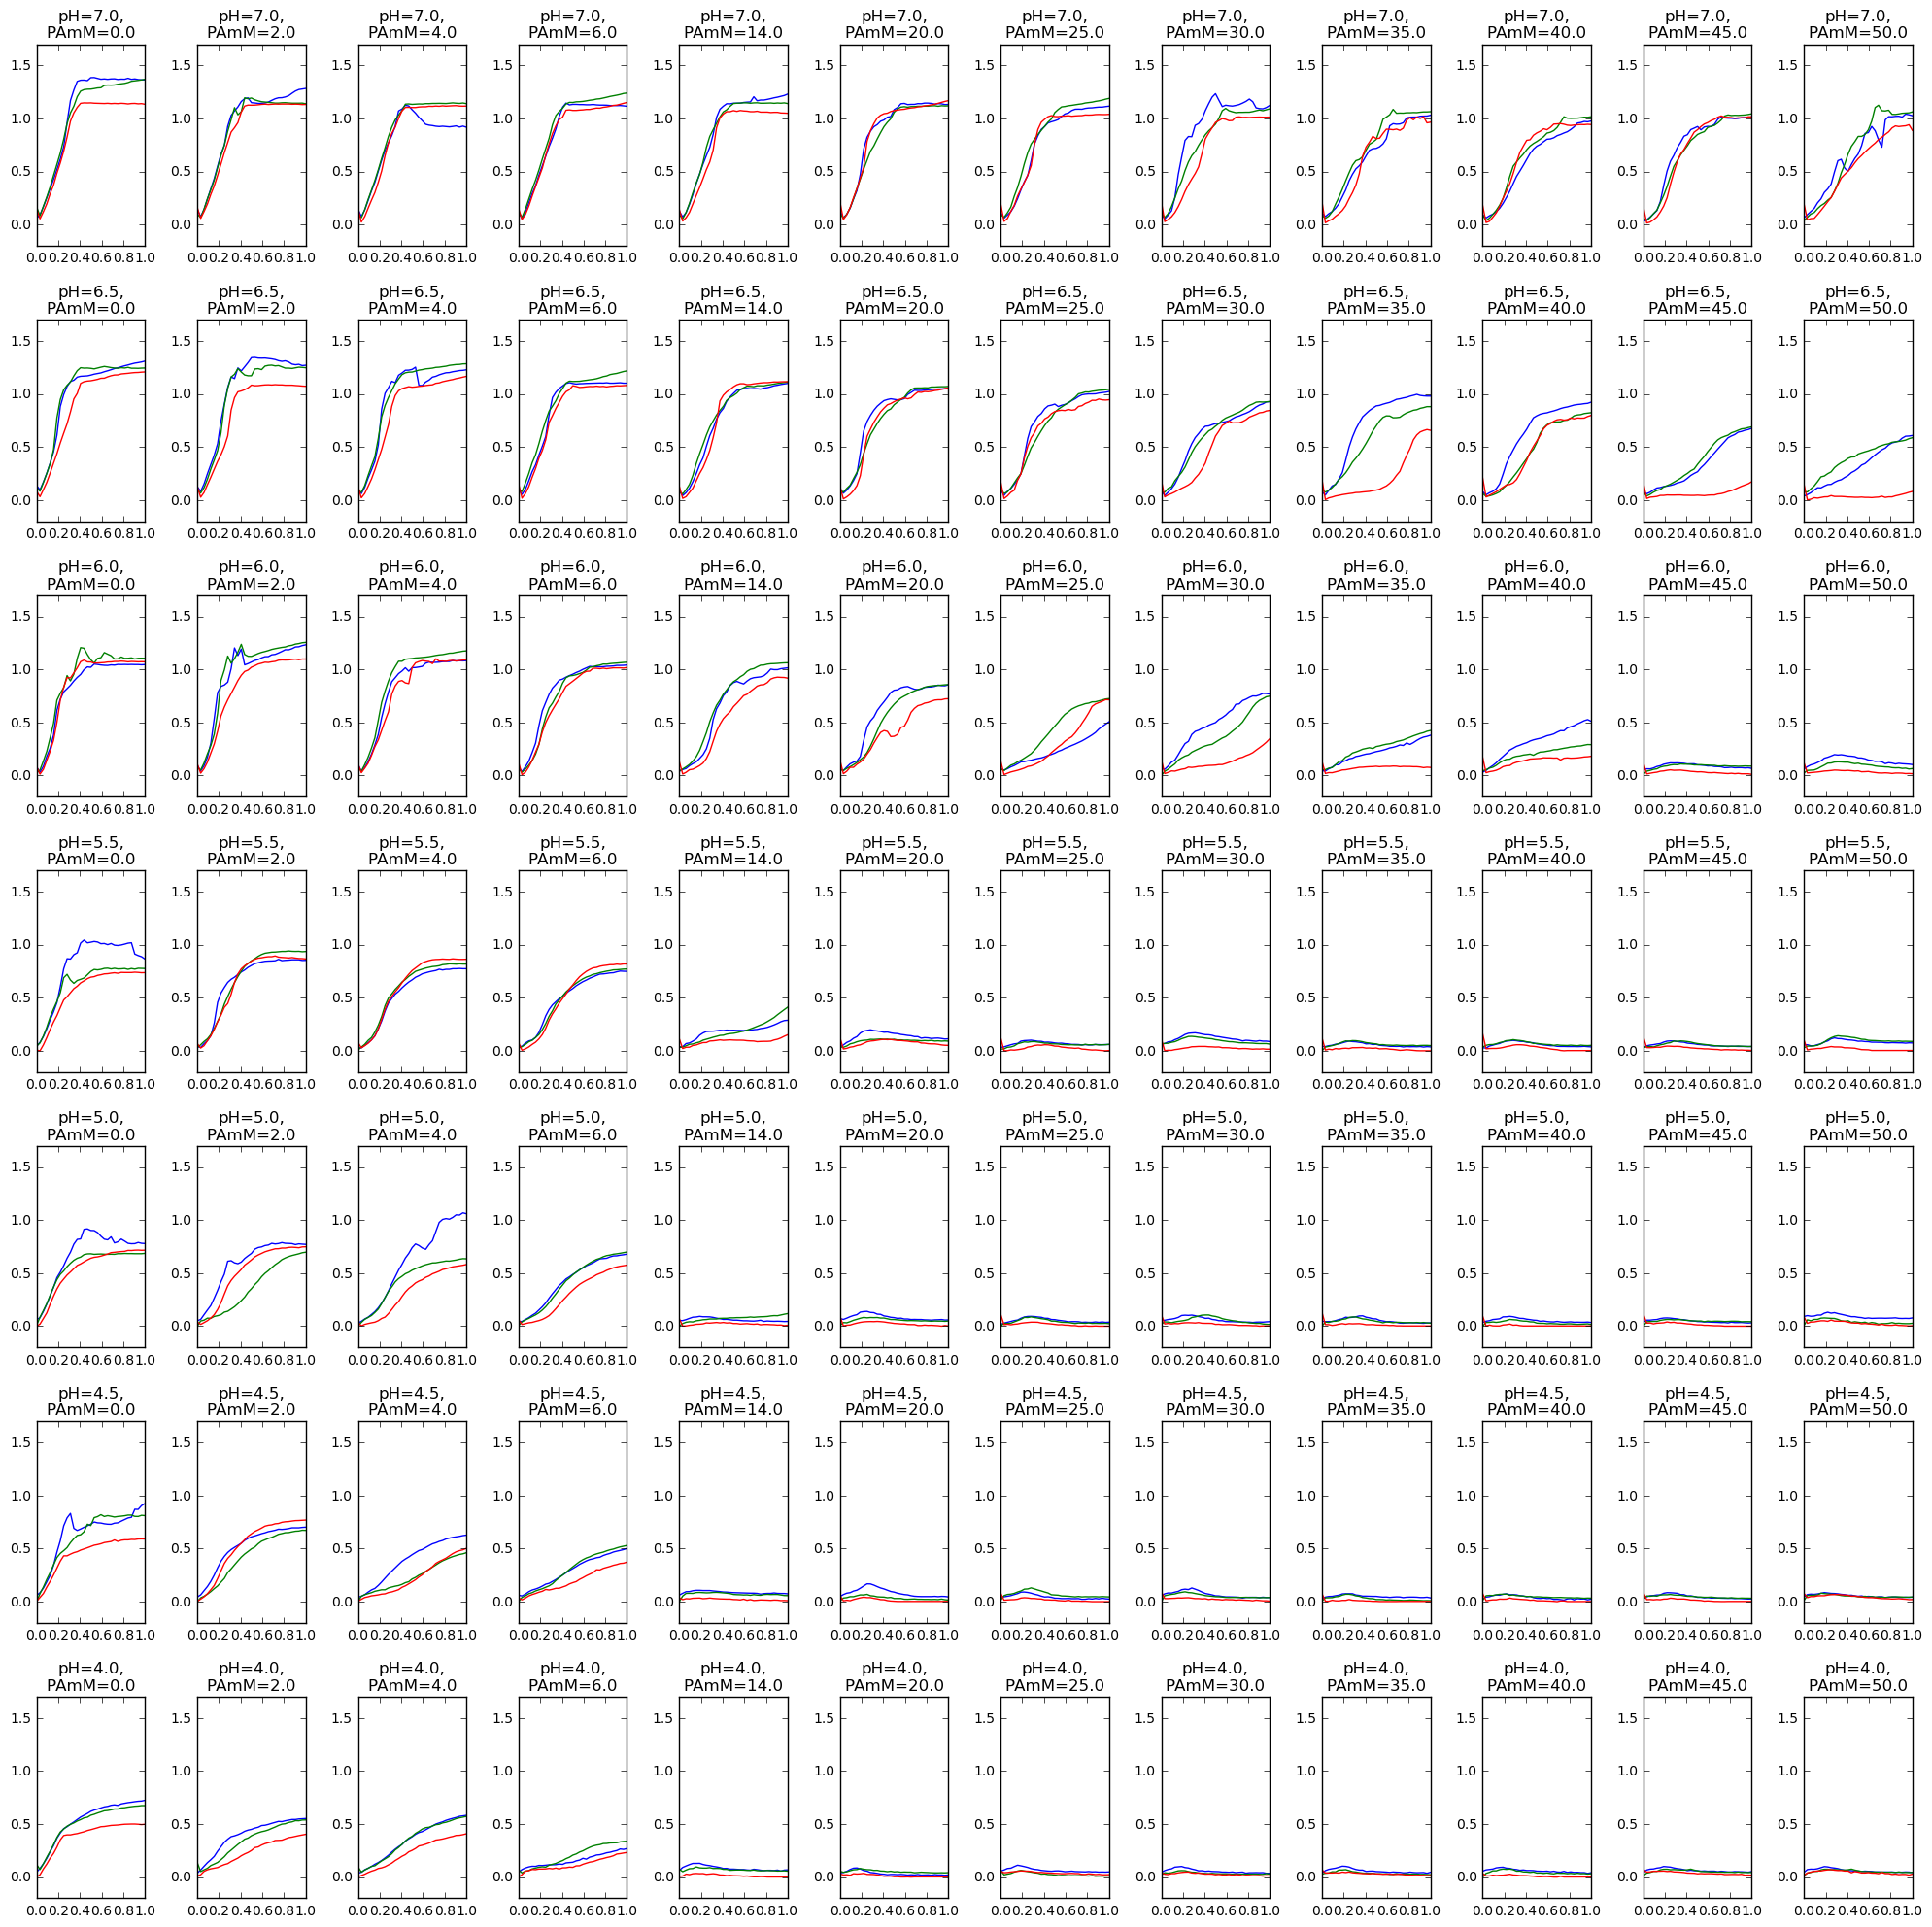

In [79]:
plt.figure(figsize=(20,20))

for i in np.unique(effect.values[:,0]):
    for j in np.unique(effect.values[:,1]):
        plt.subplot(len(labels[0]),len(labels[1]),i*len(labels[1])+j+1)
        plt.title("pH=%s,\nPAmM=%s"%(labels[0][i],labels[1][j]))
        select = (effect.values[:,0] == i) & (effect.values[:,1] == j)
        plt.plot(x,y[:,select]);
        
        plt.ylim(-.2,1.7)
        
plt.tight_layout()

plt.savefig("figures/lund/ecoli.png",dpi=300,bbox_inches='tight')

In [109]:
ds = gpfanova.dataset.DataSet('data/lund/ecoli-replicate/')

temp = ds.meta.position.str.extract('([A-Z]?)([0-9]{1,2})\.?[0-9]?')
temp.columns = ['row','column']

row = None
for i,r in temp.iterrows():
    if r.row != '':
        row = r.row
    else:
         temp.loc[i,'row'] = row
            
ds.meta = temp

x,y,effect,labels = ds.build(effects=['row','column'],scale='range')
# y = (y-y.mean())/y.std()

dm = np.ones((y.shape[1],1))

/home/ptonner/dev/combinatorial-growth/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


In [110]:
effect

,row,column
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
5,0,5
6,0,6
7,0,7
8,0,8
9,0,9


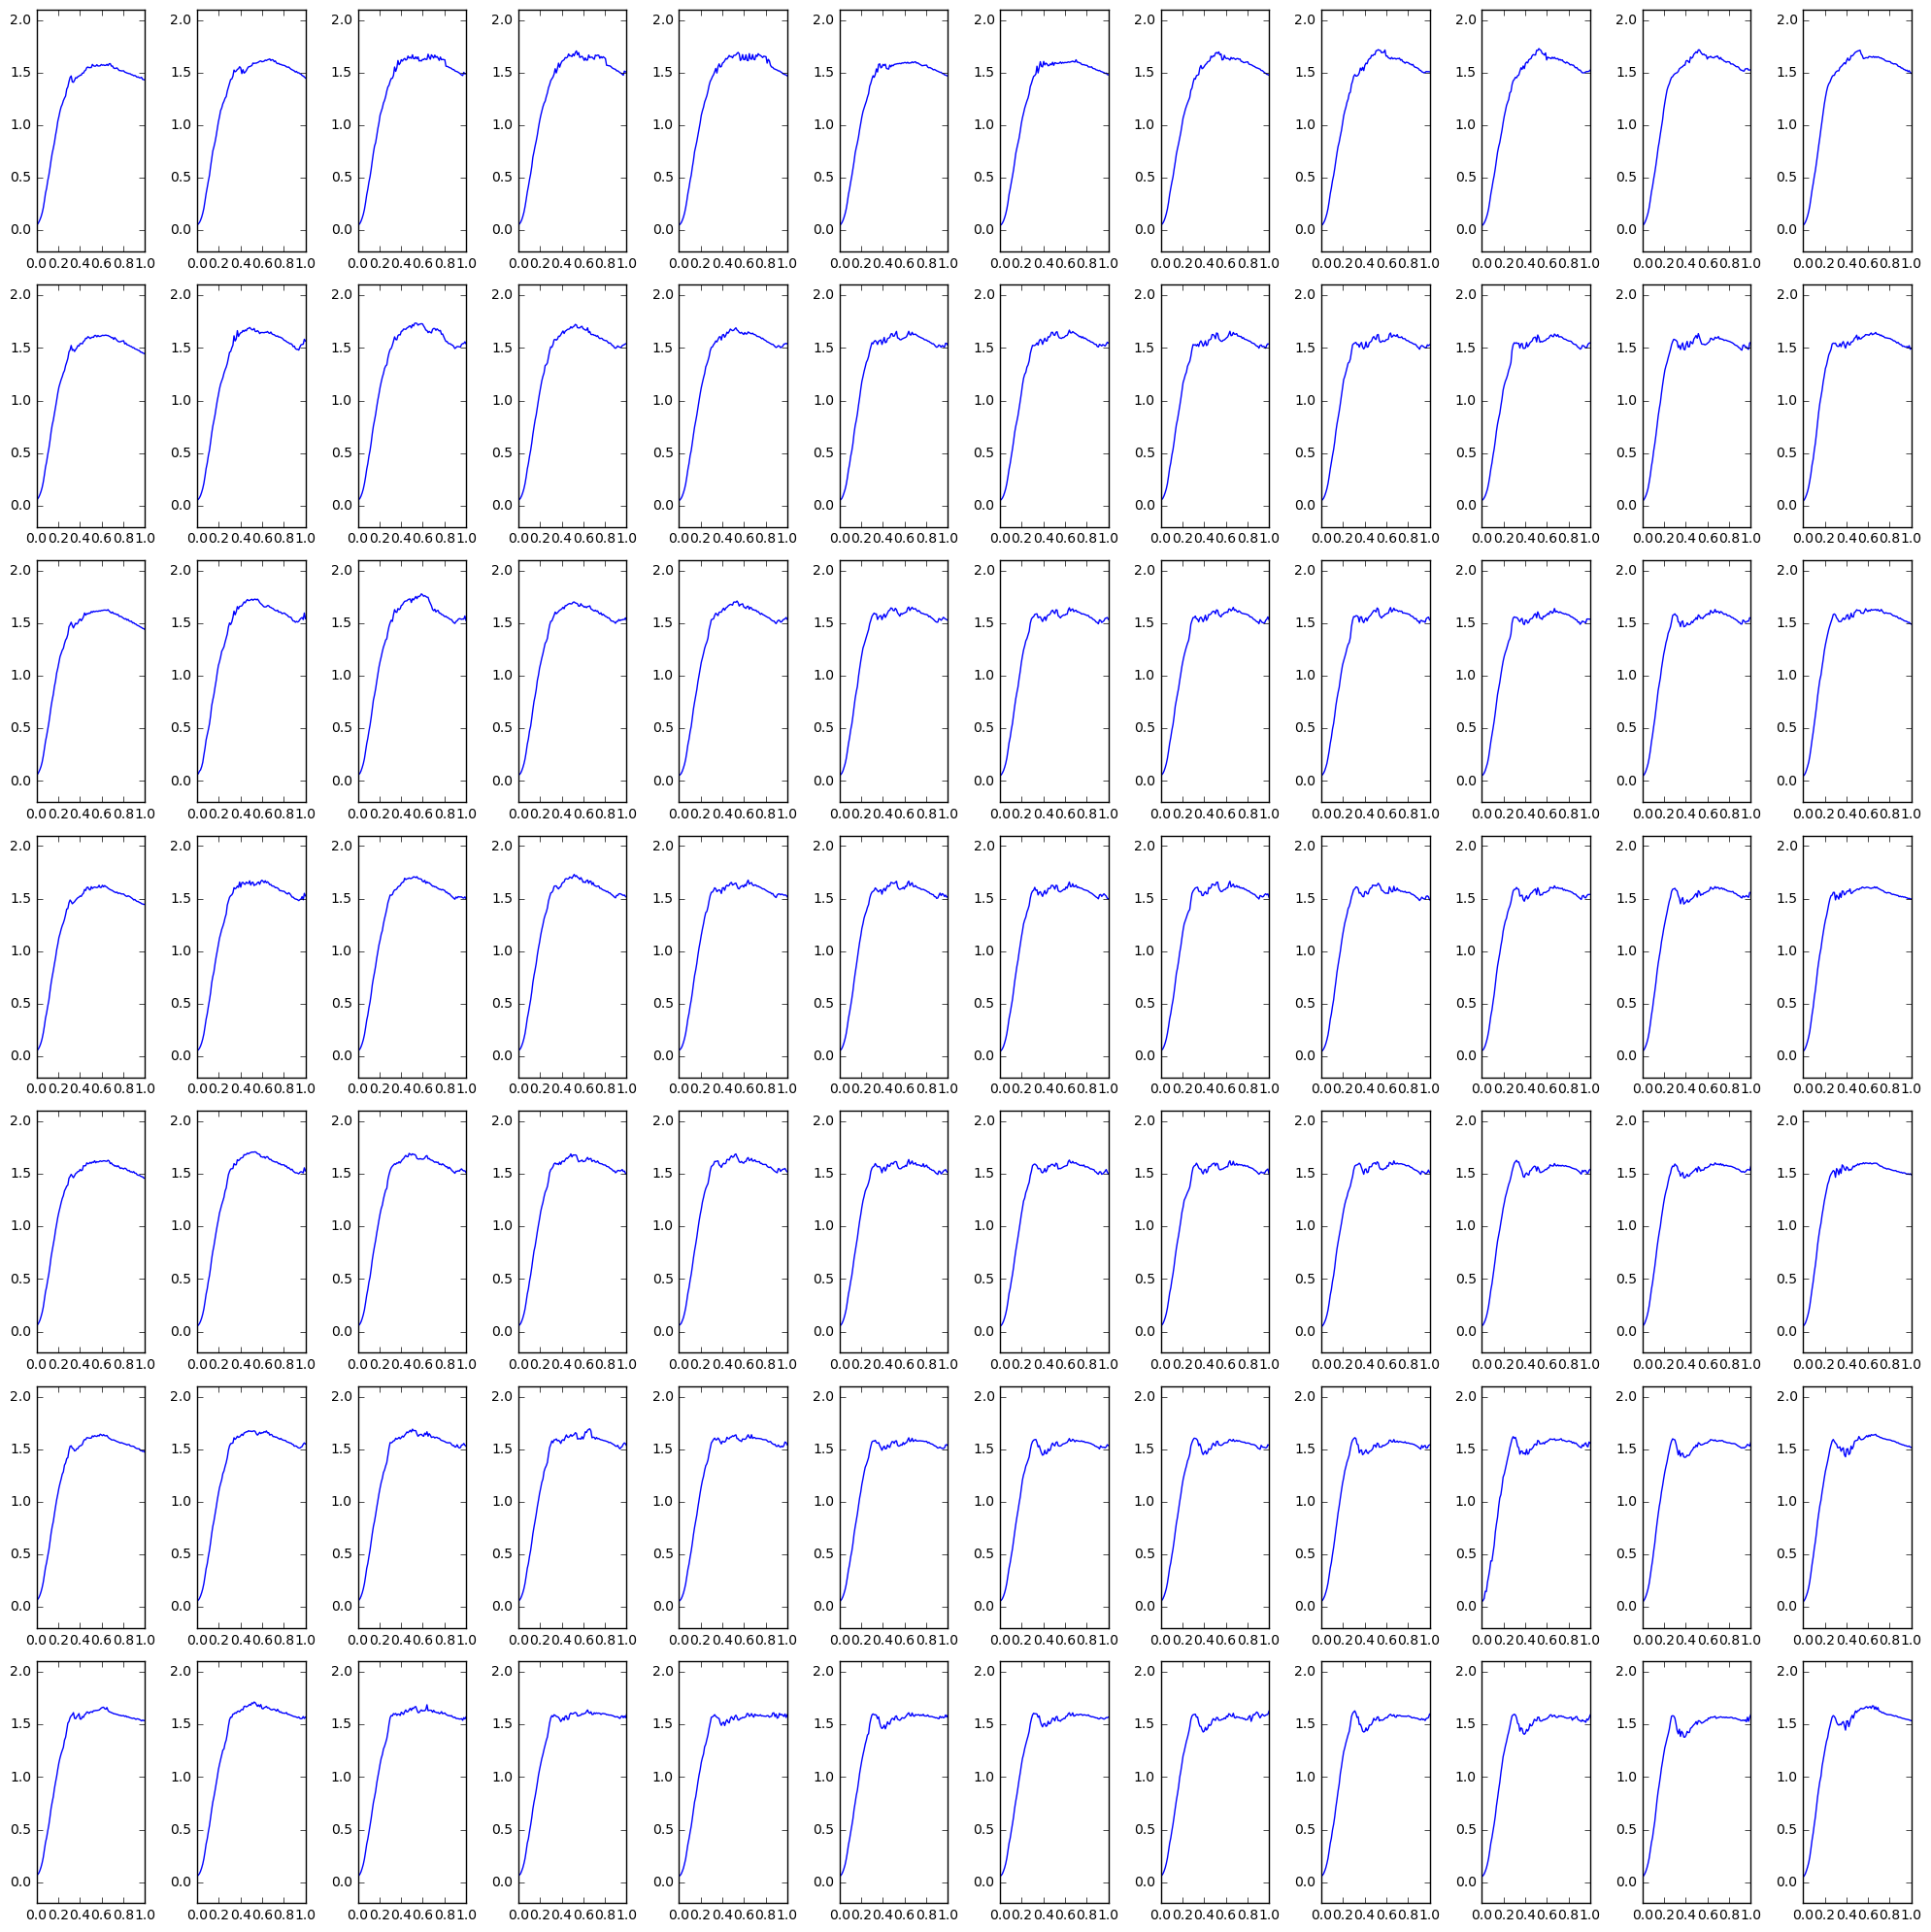

In [114]:
plt.figure(figsize=(20,20))

for i in np.unique(effect.values[:,0]):
    for j in np.unique(effect.values[:,1]):
        plt.subplot(len(labels[0]),len(labels[1]),i*len(labels[1])+j+1)
        #plt.title("pH=%s,\nPAmM=%s"%(labels[0][i],labels[1][j]))
        select = (effect.values[:,0] == i) & (effect.values[:,1] == j)
        plt.plot(x,y[:,select]);
        
        plt.ylim(-.2,2.1)
        
plt.tight_layout()

plt.savefig("figures/lund/ecoli-replicate.png",dpi=300,bbox_inches='tight')

# Pseudomonas

In [66]:
ds = gpfanova.dataset.DataSet('data/normalized/lund/pseudomonas/')

sortby = ['acid','pH','mM-acid']
ds.data = ds.data.iloc[:,ds.meta.sort(sortby).index]
ds.meta = ds.meta.sort(sortby)

ds.data.columns = range(ds.data.shape[1])
ds.meta.index = range(ds.data.shape[1])

# x,y,effect,labels = ds.build(scale='range',effects=['pH','mM lactic acid','strain'])
x,y,effect,labels = ds.build(effects=['pH','mM-acid','strain'],acid='acetic')

# ind = 4
# x = x[4:,:]
# y = y[4:,:]
# y = np.log2(y)
# y = y-y[0,:]

# y = (y-y.mean())/y.std()

dm = np.ones((y.shape[1],1))

/home/ptonner/dev/combinatorial-growth/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/ptonner/dev/combinatorial-growth/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


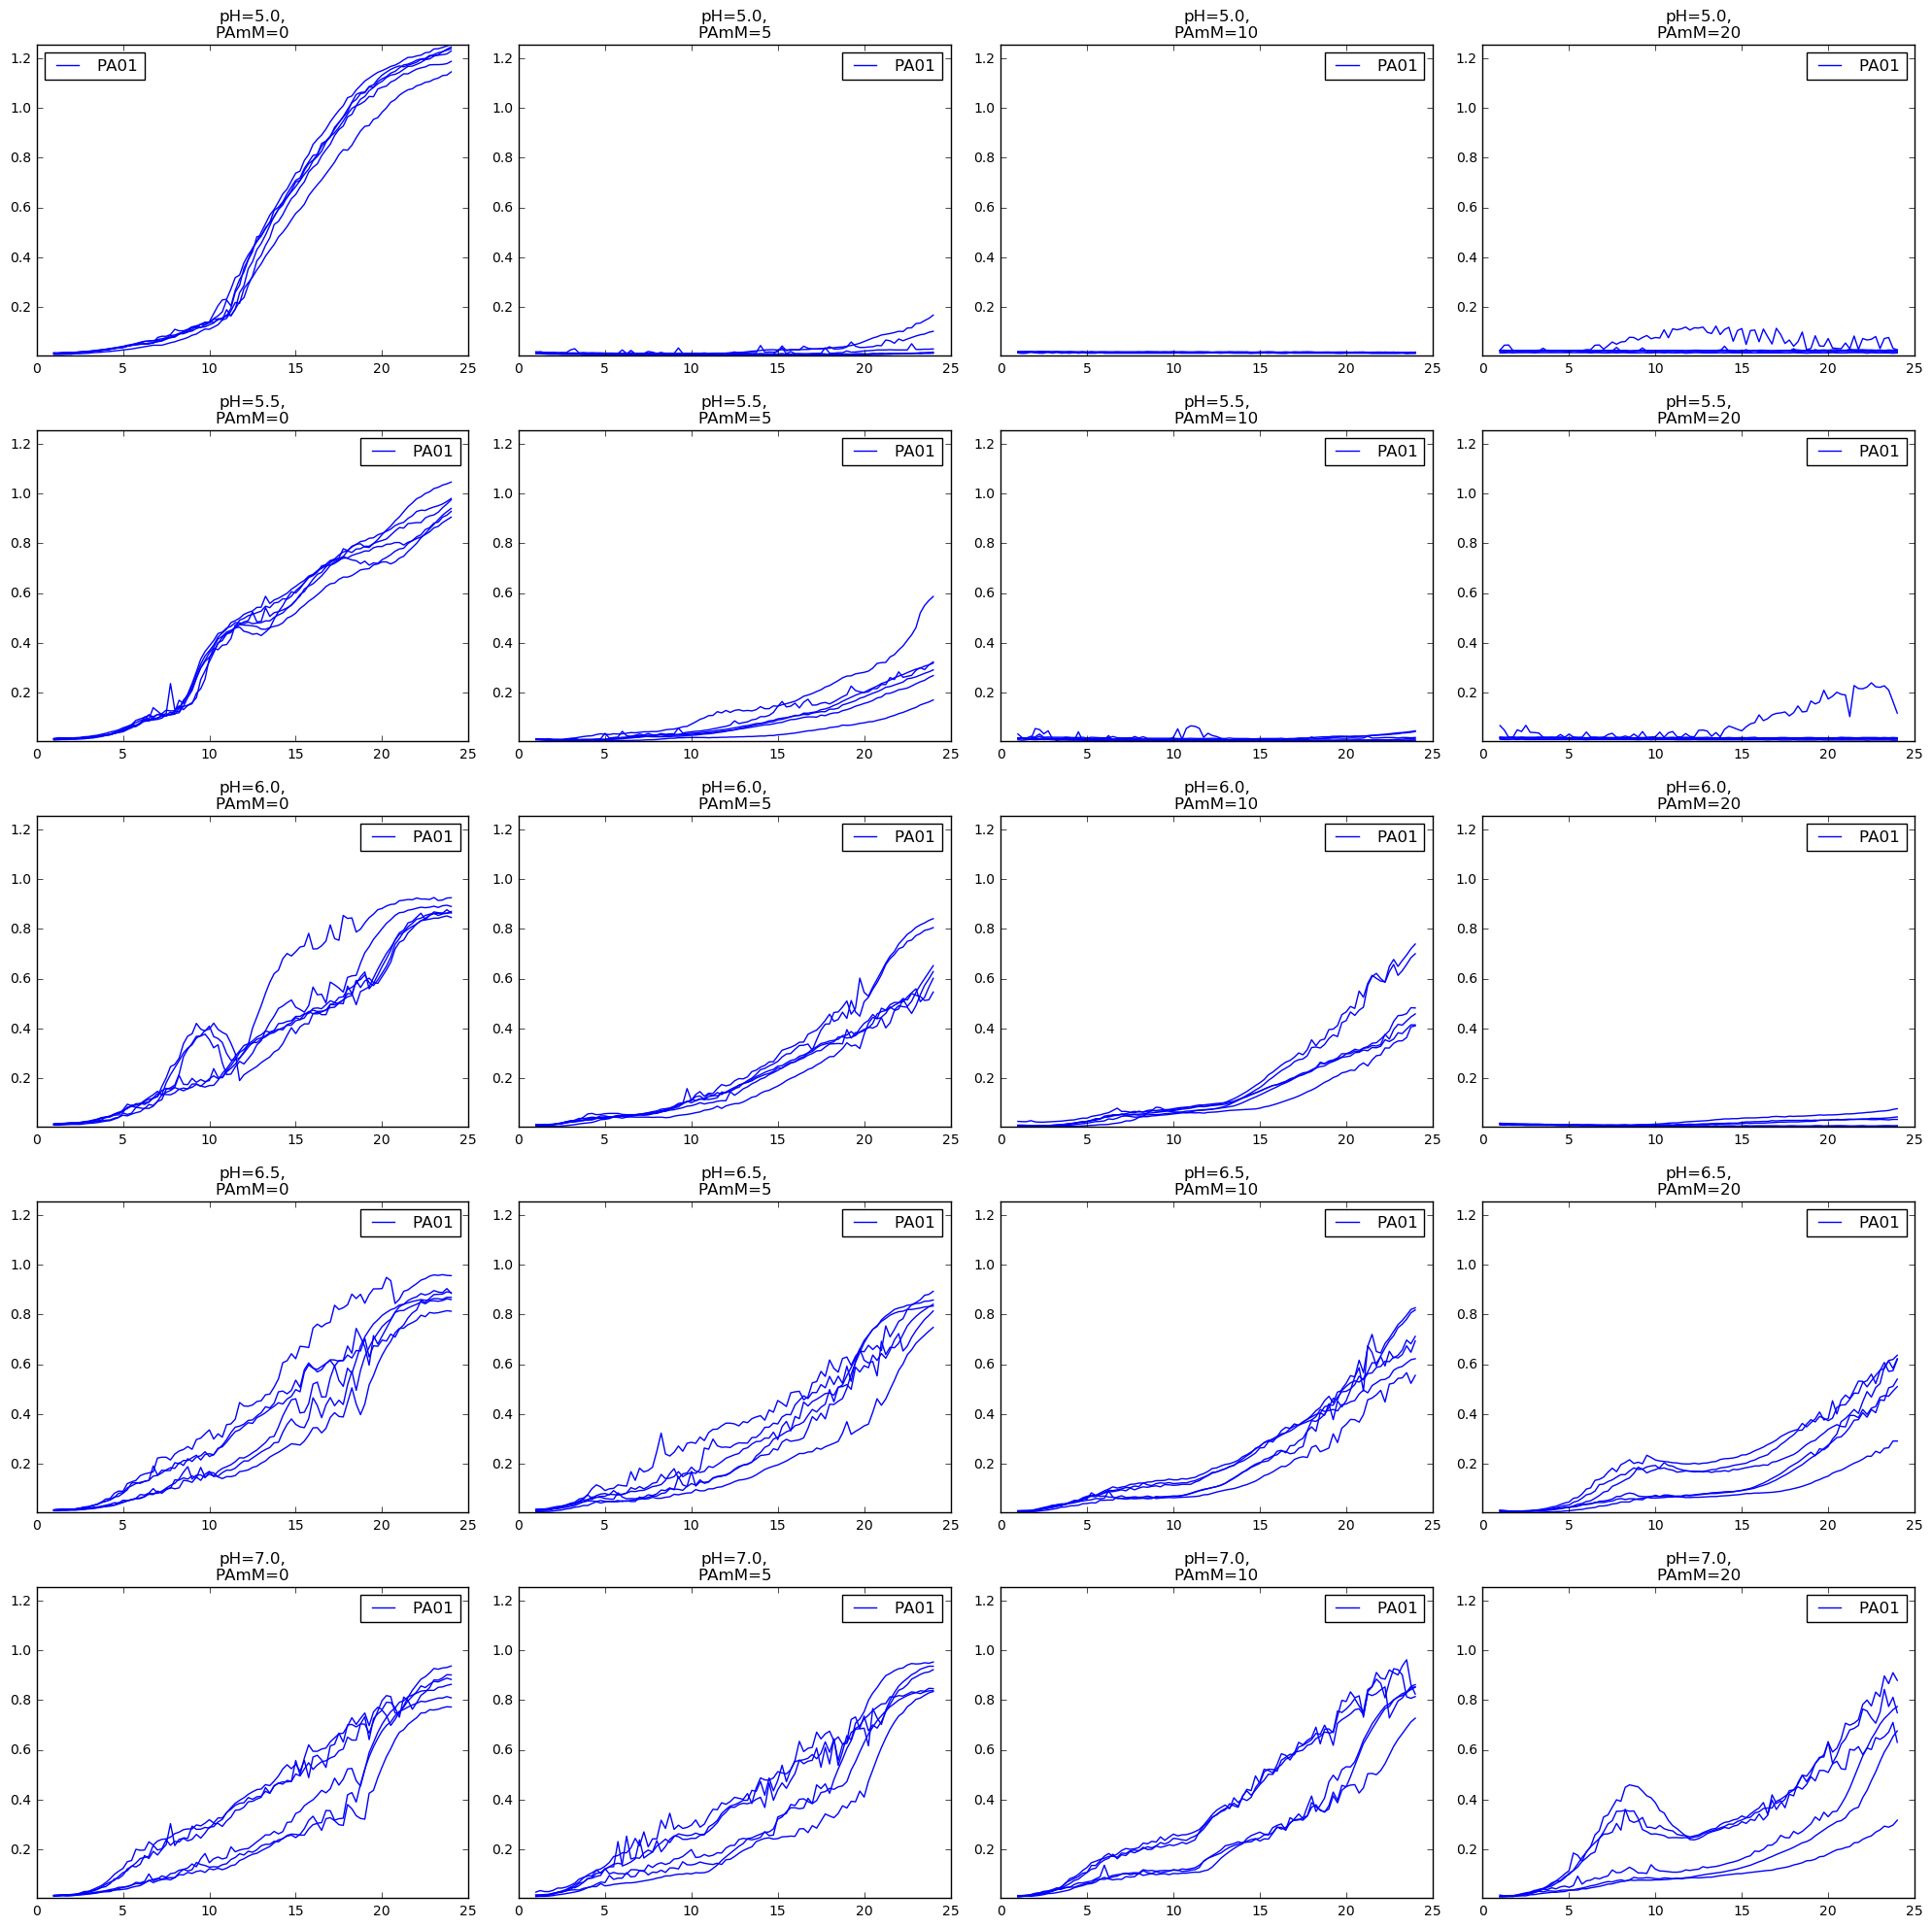

In [58]:
plt.figure(figsize=(20,20))

colors = ['b','g']

for i in np.unique(effect.values[:,0]):
    for j in np.unique(effect.values[:,1]):
        plt.subplot(len(labels[0]),len(labels[1]),i*len(labels[1])+j+1)
        plt.title("pH=%s,\nPAmM=%s"%(labels[0][i],labels[1][j]))
        
        for k in np.unique(effect.values[:,2]):
            select = (effect.values[:,0] == i) & (effect.values[:,1] == j) & (effect.values[:,2] == k)
            
            for ii,jj in enumerate(np.where(select)[0]):
                l = None
                if ii == 0:
                    l = labels[2][k]
                plt.plot(x,y[:,jj],c=colors[k],label=l);
            
            #plt.plot(x,y[:,select],c=colors[k],label=labels[2][k]);

            plt.ylim(y.min(),y.max())
            plt.legend(loc='best')
        
plt.tight_layout()

plt.savefig("figures/lund/pseudomonas-acetic-unlogged.png",dpi=300,bbox_inches='tight')

In [69]:
x,y,effect,labels = ds.build(effects=['pH','mM-acid','batch'],acid='acetic')

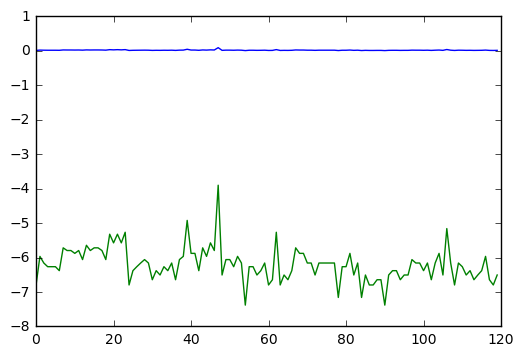

In [70]:
plt.plot(np.log2(y[0,:]+1e-0))
plt.plot(np.log2(y[0,:]))

In [71]:
# ind = 4
# x = x[ind:,:]
# y = y[ind:,:]

y = np.log2(y+1e0)
y = y-y[0,:]

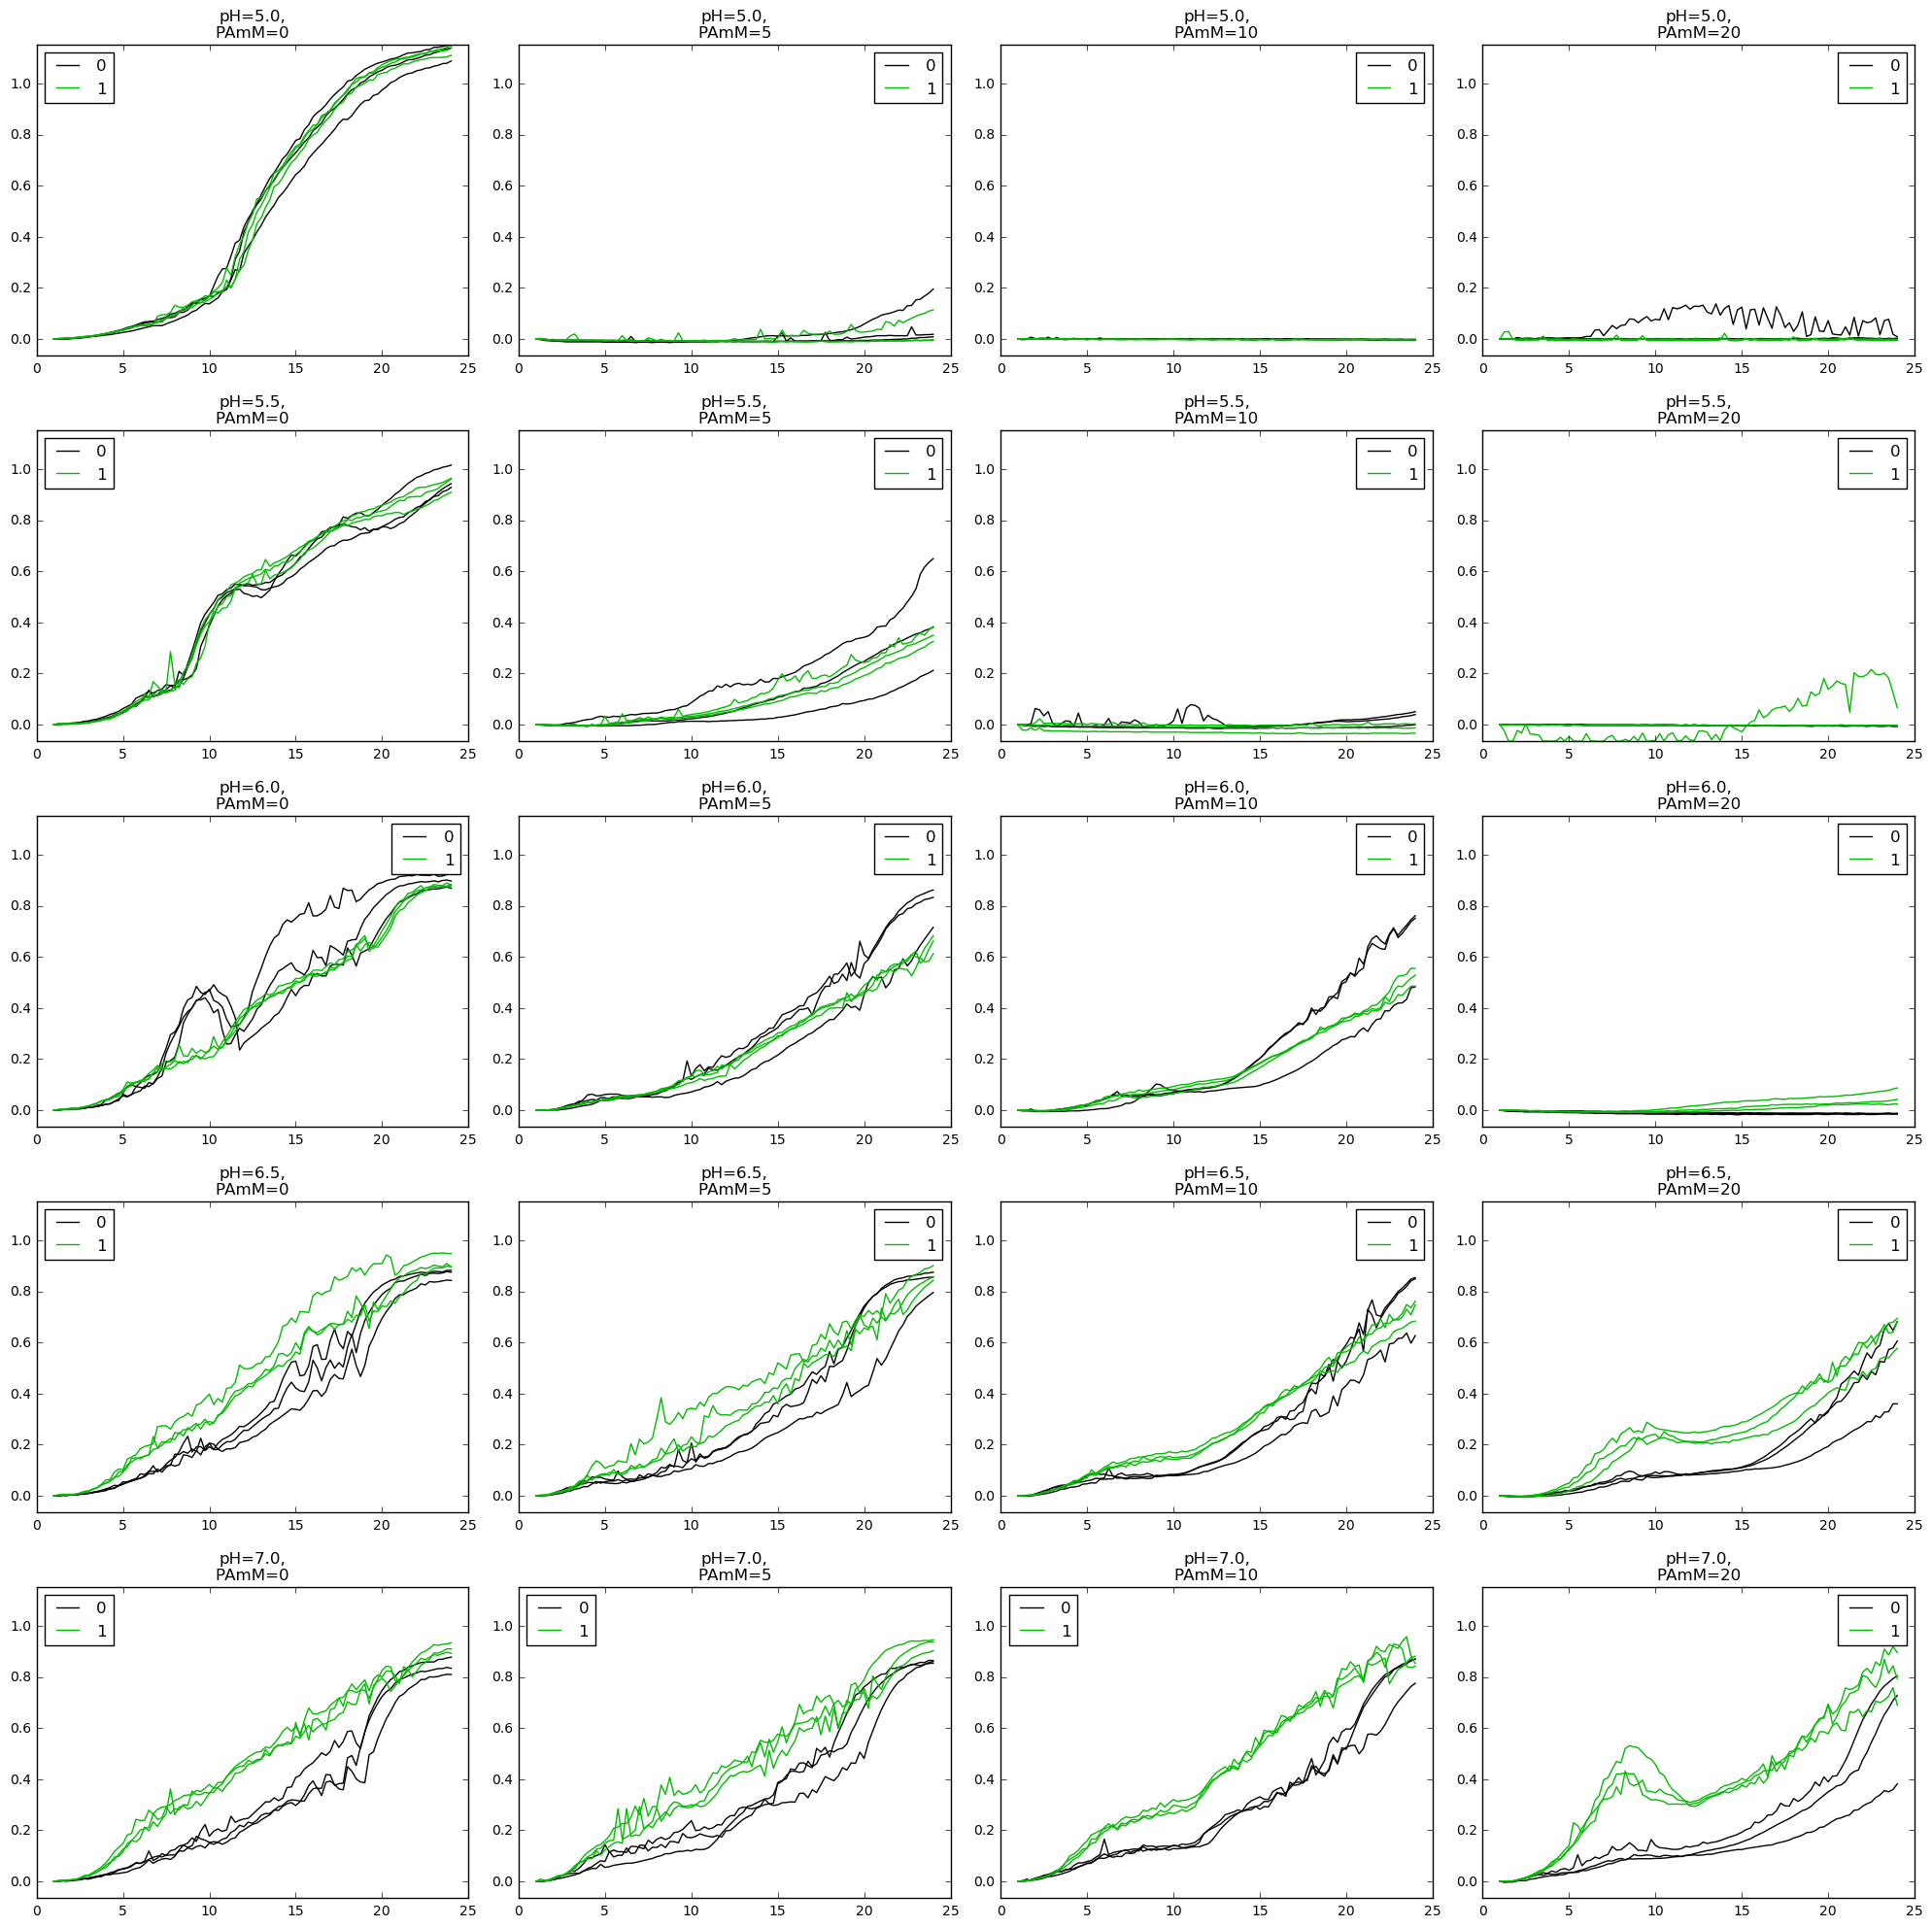

In [72]:
plt.figure(figsize=(20,20))

cmap = plt.get_cmap('spectral')
colors = [cmap(1.*i/2) for i in range(2)]

for i in np.unique(effect.values[:,0]):
    for j in np.unique(effect.values[:,1]):
        plt.subplot(len(labels[0]),len(labels[1]),i*len(labels[1])+j+1)
        plt.title("pH=%s,\nPAmM=%s"%(labels[0][i],labels[1][j]))
        
        for k in np.unique(effect.values[:,2]):
            select = (effect.values[:,0] == i) & (effect.values[:,1] == j) & (effect.values[:,2] == k)
            
            for ii,jj in enumerate(np.where(select)[0]):
                l = None
                if ii == 0:
                    l = labels[2][k]
                plt.plot(x,y[:,jj],c=colors[k],label=l);
            
            #plt.plot(x,y[:,select],c=colors[k],label=labels[2][k]);

            plt.ylim(y.min(),y.max())
            plt.legend(loc='best')
        
plt.tight_layout()

plt.savefig("figures/lund/pseudomonas-acetic.png",dpi=300,bbox_inches='tight')

In [81]:
x,y,effect,labels = ds.build(effects=['pH','mM-acid','batch'],acid='propionic')

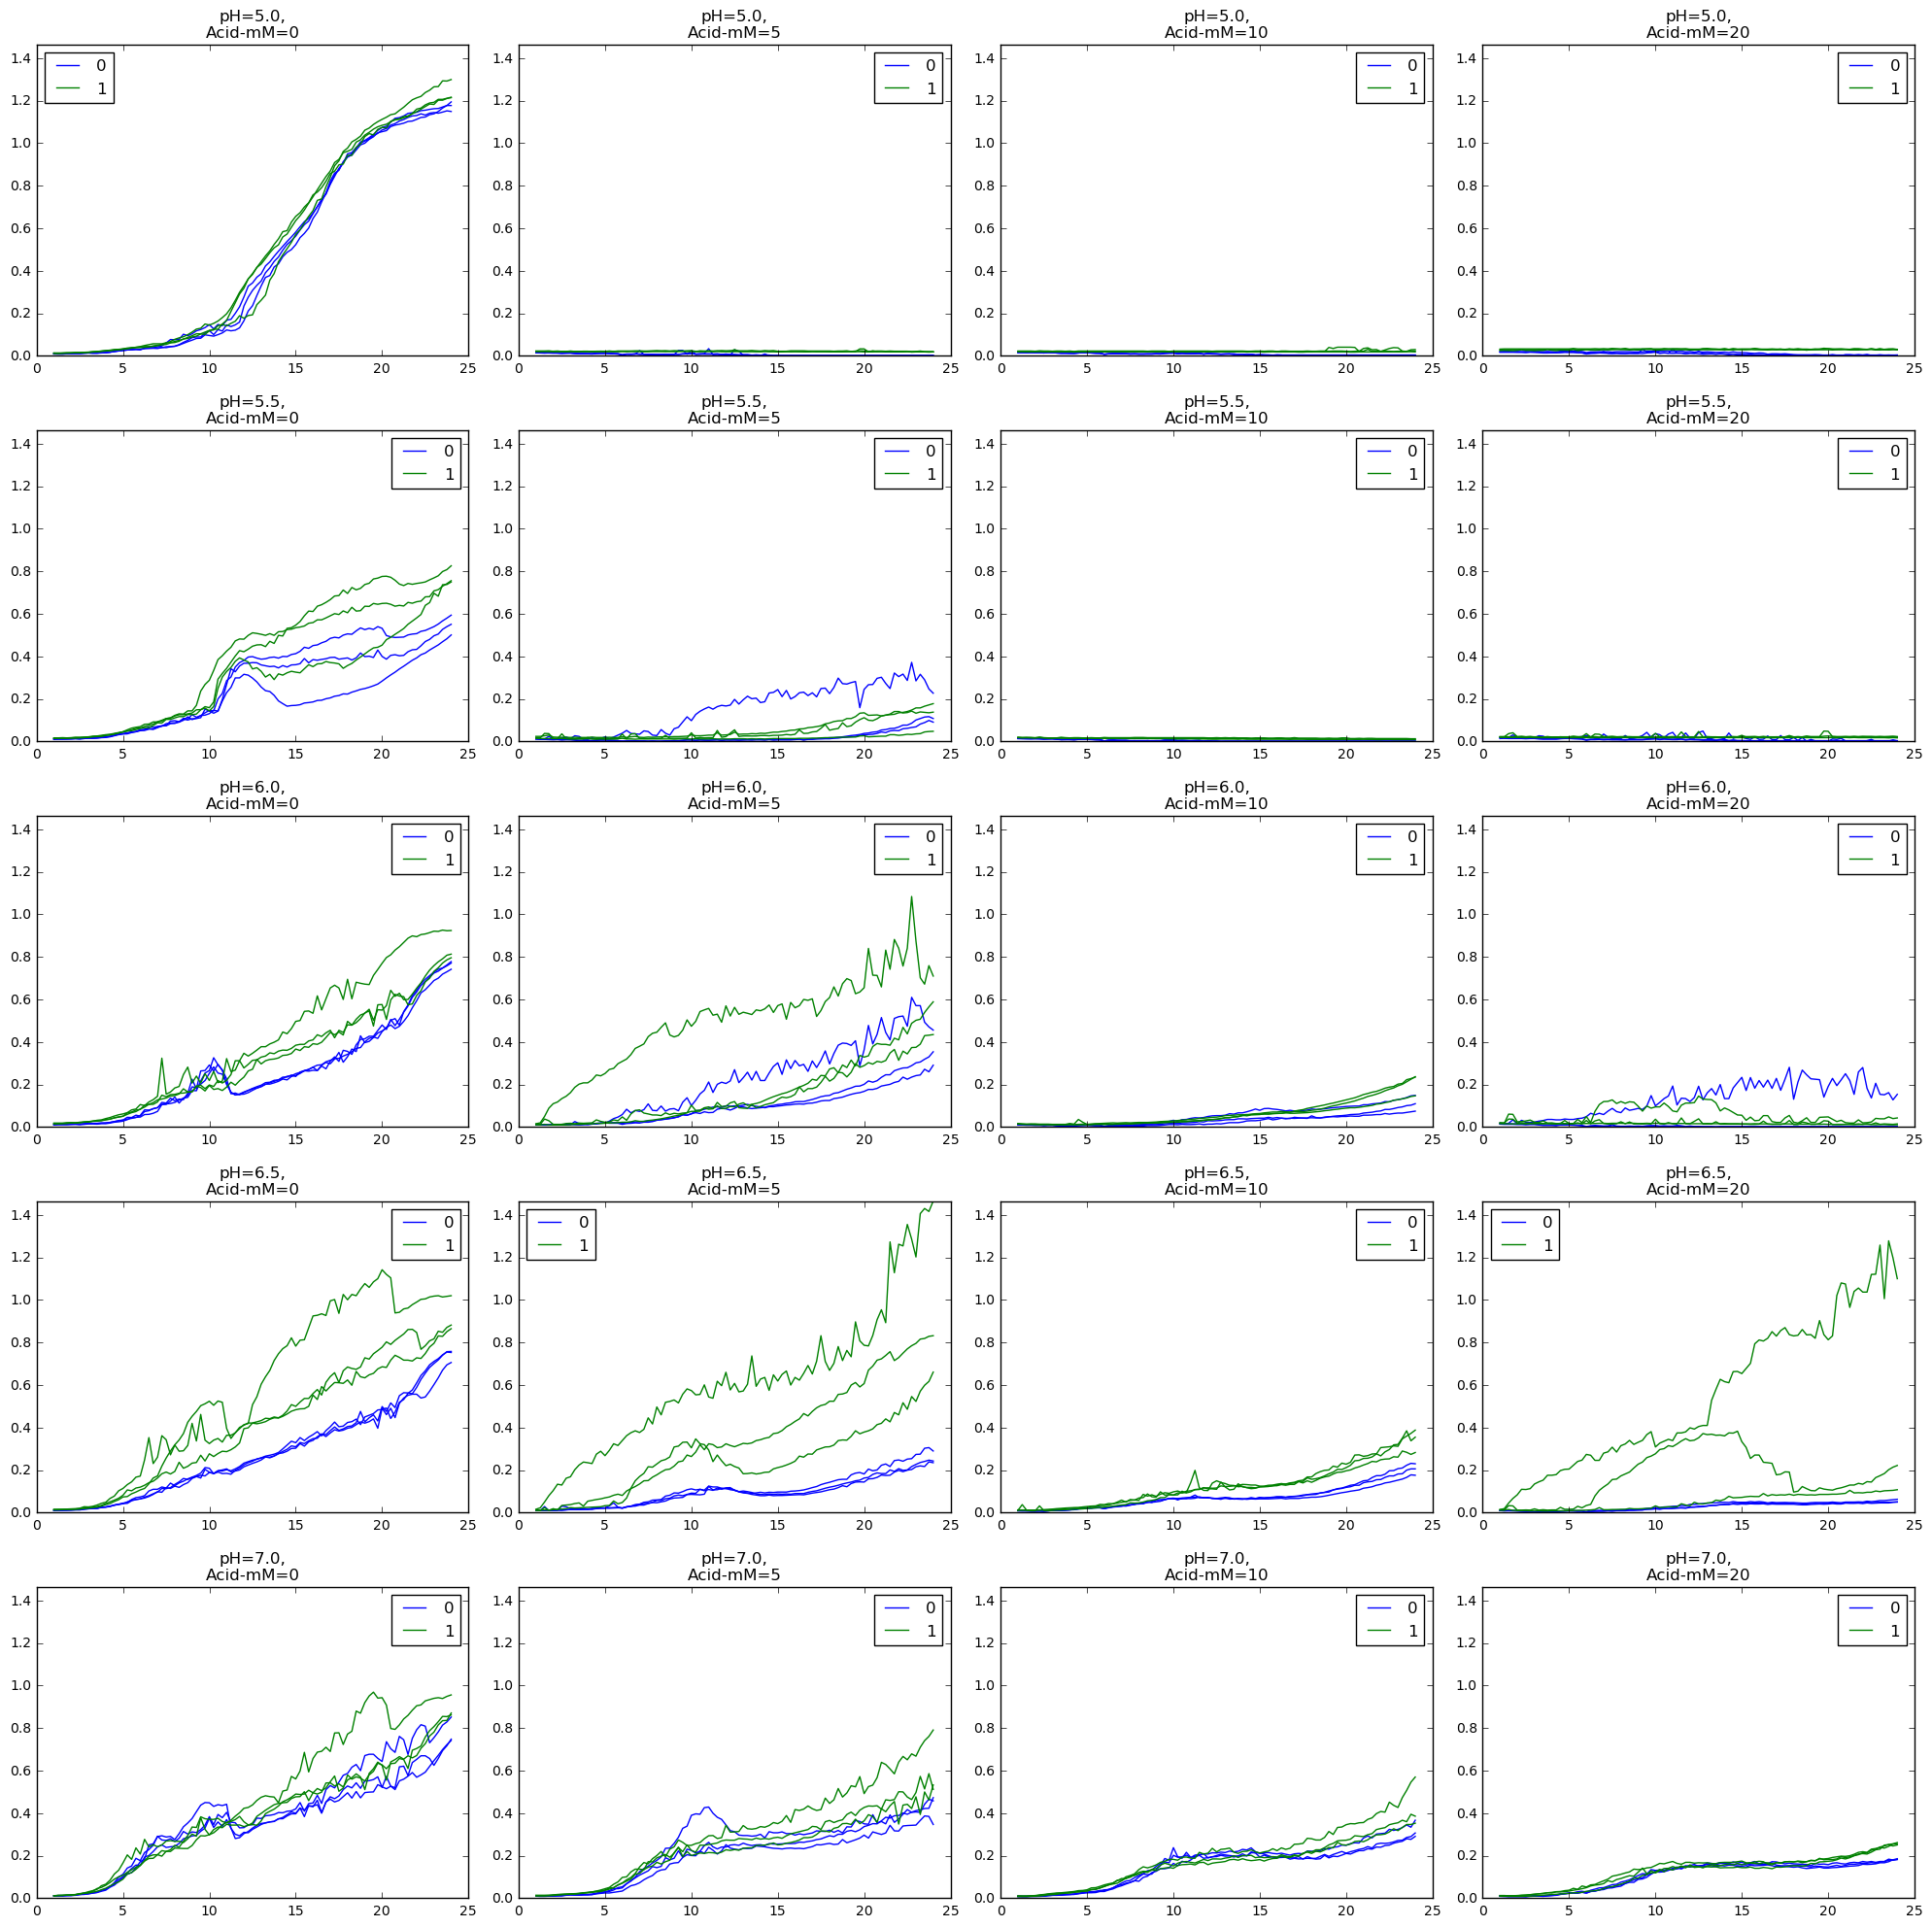

In [82]:
plt.figure(figsize=(20,20))

colors = ['b','g']

for i in np.unique(effect.values[:,0]):
    for j in np.unique(effect.values[:,1]):
        plt.subplot(len(labels[0]),len(labels[1]),i*len(labels[1])+j+1)
        plt.title("pH=%s,\nAcid-mM=%s"%(labels[0][i],labels[1][j]))
        
        for k in np.unique(effect.values[:,2]):
            select = (effect.values[:,0] == i) & (effect.values[:,1] == j) & (effect.values[:,2] == k)
            
            for ii,jj in enumerate(np.where(select)[0]):
                l = None
                if ii == 0:
                    l = labels[2][k]
                plt.plot(x,y[:,jj],c=colors[k],label=l);
            
            #plt.plot(x,y[:,select],c=colors[k],label=labels[2][k]);

            plt.ylim(y.min(),y.max())
            plt.legend(loc='best')
        
plt.tight_layout()

plt.savefig("figures/lund/pseudomonas-propionic-unlogged.png",dpi=300,bbox_inches='tight')

In [83]:
# ind = 4
# x = x[ind:,:]
# y = y[ind:,:]

y = np.log2(y+1e0)
y = y-y[0,:]

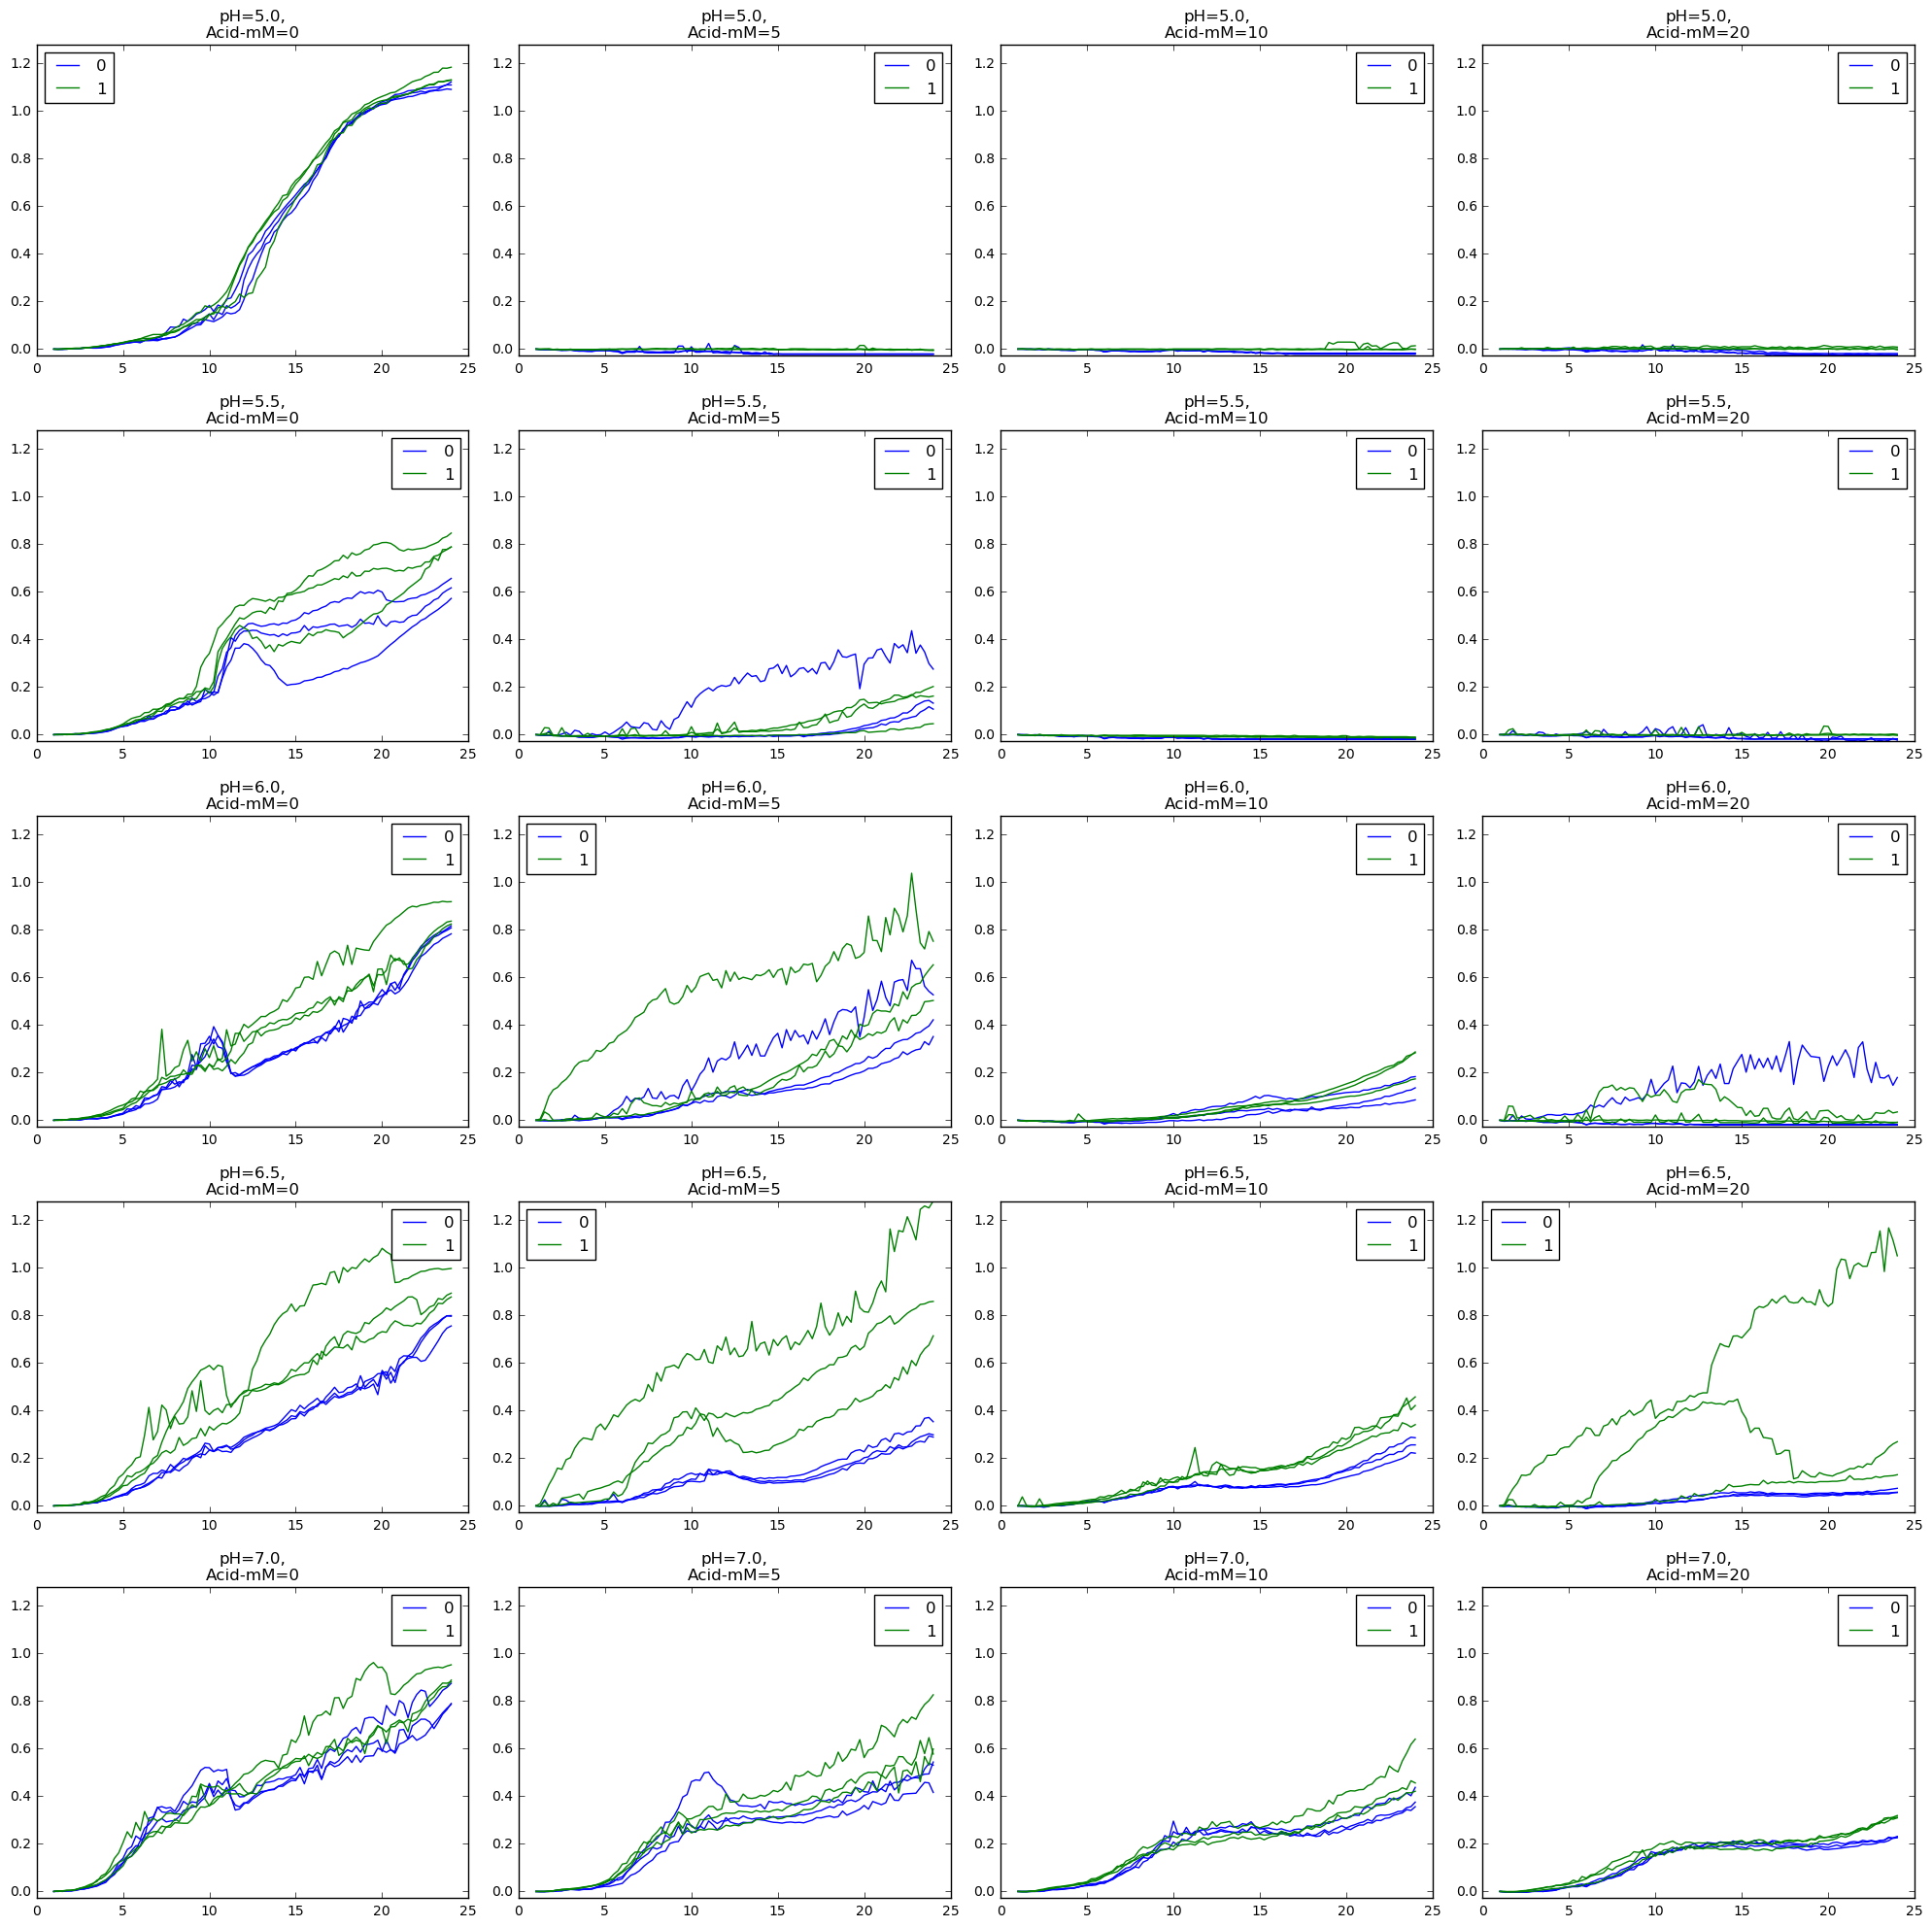

In [84]:
plt.figure(figsize=(20,20))

colors = ['b','g']

for i in np.unique(effect.values[:,0]):
    for j in np.unique(effect.values[:,1]):
        plt.subplot(len(labels[0]),len(labels[1]),i*len(labels[1])+j+1)
        plt.title("pH=%s,\nAcid-mM=%s"%(labels[0][i],labels[1][j]))
        
        for k in np.unique(effect.values[:,2]):
            select = (effect.values[:,0] == i) & (effect.values[:,1] == j) & (effect.values[:,2] == k)
            
            for ii,jj in enumerate(np.where(select)[0]):
                l = None
                if ii == 0:
                    l = labels[2][k]
                plt.plot(x,y[:,jj],c=colors[k],label=l);
            
            #plt.plot(x,y[:,select],c=colors[k],label=labels[2][k]);

            plt.ylim(y.min(),y.max())
            plt.legend(loc='best')
        
plt.tight_layout()

plt.savefig("figures/lund/pseudomonas-propionic.png",dpi=300,bbox_inches='tight')